In [37]:
import pandas as pd

## make one csv from multiple csv in a folder
import os
import glob

path = r'../data/men/' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)

concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.to_csv( "combined_men_2004-2023.csv", index=False)


In [38]:
# import pycountry for country code
import pycountry

In [39]:
## read the combined csv
pd.set_option('display.max_rows', None)
df_men = pd.read_csv('combined_men_2004-2023.csv')
df_men.head()

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score
0,1,2:03:03,NaN,Kenenisa BEKELE,13 JUN 1982,ETH,1,NaN,Berlin (GER),25 SEP 2016,1278
1,2,2:03:05,NaN,Eliud KIPCHOGE,05 NOV 1984,KEN,1,NaN,London (GBR),24 APR 2016,1278
2,3,2:03:13,NaN,Wilson Kipsang KIPROTICH,15 MAR 1982,KEN,2,NaN,Berlin (GER),25 SEP 2016,1275
3,4,2:03:51,NaN,Stanley Kipleting BIWOTT,21 APR 1986,KEN,2,NaN,London (GBR),24 APR 2016,1264
4,5,2:04:24,NaN,Tesfaye ABERA,31 MAR 1992,ETH,1,NaN,Dubai (UAE),22 JAN 2016,1255


In [40]:
# add a column for year use the year of Date column
df_men['Year'] = pd.DatetimeIndex(df_men['Date']).year

df_men.head(20)

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year
0,1,2:03:03,NaN,Kenenisa BEKELE,13 JUN 1982,ETH,1,NaN,Berlin (GER),25 SEP 2016,1278,2016
1,2,2:03:05,NaN,Eliud KIPCHOGE,05 NOV 1984,KEN,1,NaN,London (GBR),24 APR 2016,1278,2016
2,3,2:03:13,NaN,Wilson Kipsang KIPROTICH,15 MAR 1982,KEN,2,NaN,Berlin (GER),25 SEP 2016,1275,2016
3,4,2:03:51,NaN,Stanley Kipleting BIWOTT,21 APR 1986,KEN,2,NaN,London (GBR),24 APR 2016,1264,2016
4,5,2:04:24,NaN,Tesfaye ABERA,31 MAR 1992,ETH,1,NaN,Dubai (UAE),22 JAN 2016,1255,2016
5,6,2:04:33,NaN,Lemi BERHANU,13 SEP 1994,ETH,2,NaN,Dubai (UAE),22 JAN 2016,1252,2016
6,7,2:04:46,NaN,Tsegaye MEKONNEN,15 JUN 1995,ETH,3,NaN,Dubai (UAE),22 JAN 2016,1249,2016
7,8,2:05:13,NaN,Wilson Loyanae ERUPE,20 NOV 1988,KEN,1,NaN,Seoul (KOR),20 MAR 2016,1241,2016
8,9,2:05:16,NaN,Sisay LEMMA,12 DEC 1990,ETH,4,NaN,Dubai (UAE),22 JAN 2016,1240,2016
9,10,2:05:21,NaN,Daniel KINYUA,25 MAY 1992,KEN,1,NaN,Amsterdam (NED),16 OCT 2016,1239,2016


In [41]:

# Convert 'Mark' to timedelta
df_men['Time'] = pd.to_timedelta(df_men['Mark'])

# Convert timedelta to total seconds
df_men['Time_in_seconds'] = df_men['Time'].dt.total_seconds().astype(int)
df_men.head(20)

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year,Time,Time_in_seconds
0,1,2:03:03,NaN,Kenenisa BEKELE,13 JUN 1982,ETH,1,NaN,Berlin (GER),25 SEP 2016,1278,2016,0 days 02:03:03,7383
1,2,2:03:05,NaN,Eliud KIPCHOGE,05 NOV 1984,KEN,1,NaN,London (GBR),24 APR 2016,1278,2016,0 days 02:03:05,7385
2,3,2:03:13,NaN,Wilson Kipsang KIPROTICH,15 MAR 1982,KEN,2,NaN,Berlin (GER),25 SEP 2016,1275,2016,0 days 02:03:13,7393
3,4,2:03:51,NaN,Stanley Kipleting BIWOTT,21 APR 1986,KEN,2,NaN,London (GBR),24 APR 2016,1264,2016,0 days 02:03:51,7431
4,5,2:04:24,NaN,Tesfaye ABERA,31 MAR 1992,ETH,1,NaN,Dubai (UAE),22 JAN 2016,1255,2016,0 days 02:04:24,7464
5,6,2:04:33,NaN,Lemi BERHANU,13 SEP 1994,ETH,2,NaN,Dubai (UAE),22 JAN 2016,1252,2016,0 days 02:04:33,7473
6,7,2:04:46,NaN,Tsegaye MEKONNEN,15 JUN 1995,ETH,3,NaN,Dubai (UAE),22 JAN 2016,1249,2016,0 days 02:04:46,7486
7,8,2:05:13,NaN,Wilson Loyanae ERUPE,20 NOV 1988,KEN,1,NaN,Seoul (KOR),20 MAR 2016,1241,2016,0 days 02:05:13,7513
8,9,2:05:16,NaN,Sisay LEMMA,12 DEC 1990,ETH,4,NaN,Dubai (UAE),22 JAN 2016,1240,2016,0 days 02:05:16,7516
9,10,2:05:21,NaN,Daniel KINYUA,25 MAY 1992,KEN,1,NaN,Amsterdam (NED),16 OCT 2016,1239,2016,0 days 02:05:21,7521


In [42]:
# column Nat has iso code and country name, i want add a column with the equivalent two-letter ISO country codes

def get_two_letter_code(nat):
    # Extract the ISO code from the 'Nat' column
    iso_code = nat.split(',')[0].strip()
    try:
        # Get the country object
        country = pycountry.countries.get(alpha_3=iso_code)
        if country:
            return country.alpha_2
    except LookupError:
        return None

def get_correct_alpha3_code(code):
    corrections = {
        'POR': 'PRT',  # Correct ISO alpha-3 for Portugal
        'NED': 'NLD',  # Correct ISO alpha-3 for Netherlands
        'GER': 'DEU',  # Correct ISO alpha-3 for Germany
        'SLO': 'SVK',  # Correct ISO alpha-3 for Slovakia
        'LAT': 'LVA',  # Correct ISO alpha-3 for Latvia
        'TAN': 'TZA',  # Correct ISO alpha-3 for Tanzania
        'RSA': 'ZAF',  # Correct ISO alpha-3 for South Africa
        'MGL': 'MNG',  # Correct ISO alpha-3 for Mongolia
        'SUI': 'CHE',   # Correct ISO alpha-3 for Switzerland
        'ZIM': 'ZWE'   # Correct ISO alpha-3 for Zimbabwe
    }
    return corrections.get(code, code)

# Apply the function to create the new column
# Apply the function to correct codes and then get the two-letter ISO codes
df_men['Nat_Corrected'] = df_men['Nat'].apply(get_correct_alpha3_code)
df_men['Two_Letter_ISO'] = df_men['Nat_Corrected'].apply(get_two_letter_code).str.lower()

df_men.head(20)


,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year,Time,Time_in_seconds,Nat_Corrected,Two_Letter_ISO
0,1,2:03:03,NaN,Kenenisa BEKELE,13 JUN 1982,ETH,1,NaN,Berlin (GER),25 SEP 2016,1278,2016,0 days 02:03:03,7383,ETH,et
1,2,2:03:05,NaN,Eliud KIPCHOGE,05 NOV 1984,KEN,1,NaN,London (GBR),24 APR 2016,1278,2016,0 days 02:03:05,7385,KEN,ke
2,3,2:03:13,NaN,Wilson Kipsang KIPROTICH,15 MAR 1982,KEN,2,NaN,Berlin (GER),25 SEP 2016,1275,2016,0 days 02:03:13,7393,KEN,ke
3,4,2:03:51,NaN,Stanley Kipleting BIWOTT,21 APR 1986,KEN,2,NaN,London (GBR),24 APR 2016,1264,2016,0 days 02:03:51,7431,KEN,ke
4,5,2:04:24,NaN,Tesfaye ABERA,31 MAR 1992,ETH,1,NaN,Dubai (UAE),22 JAN 2016,1255,2016,0 days 02:04:24,7464,ETH,et
5,6,2:04:33,NaN,Lemi BERHANU,13 SEP 1994,ETH,2,NaN,Dubai (UAE),22 JAN 2016,1252,2016,0 days 02:04:33,7473,ETH,et
6,7,2:04:46,NaN,Tsegaye MEKONNEN,15 JUN 1995,ETH,3,NaN,Dubai (UAE),22 JAN 2016,1249,2016,0 days 02:04:46,7486,ETH,et
7,8,2:05:13,NaN,Wilson Loyanae ERUPE,20 NOV 1988,KEN,1,NaN,Seoul (KOR),20 MAR 2016,1241,2016,0 days 02:05:13,7513,KEN,ke
8,9,2:05:16,NaN,Sisay LEMMA,12 DEC 1990,ETH,4,NaN,Dubai (UAE),22 JAN 2016,1240,2016,0 days 02:05:16,7516,ETH,et
9,10,2:05:21,NaN,Daniel KINYUA,25 MAY 1992,KEN,1,NaN,Amsterdam (NED),16 OCT 2016,1239,2016,0 days 02:05:21,7521,KEN,ke


In [43]:
# add column Flag_Datawrapper take Two_Letter_ISO in lowercase add : before and after
df_men['Flag_Datawrapper'] = ':' + df_men['Two_Letter_ISO'].str.lower() + ':'

df_men.head(10)

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year,Time,Time_in_seconds,Nat_Corrected,Two_Letter_ISO,Flag_Datawrapper
0,1,2:03:03,NaN,Kenenisa BEKELE,13 JUN 1982,ETH,1,NaN,Berlin (GER),25 SEP 2016,1278,2016,0 days 02:03:03,7383,ETH,et,:et:
1,2,2:03:05,NaN,Eliud KIPCHOGE,05 NOV 1984,KEN,1,NaN,London (GBR),24 APR 2016,1278,2016,0 days 02:03:05,7385,KEN,ke,:ke:
2,3,2:03:13,NaN,Wilson Kipsang KIPROTICH,15 MAR 1982,KEN,2,NaN,Berlin (GER),25 SEP 2016,1275,2016,0 days 02:03:13,7393,KEN,ke,:ke:
3,4,2:03:51,NaN,Stanley Kipleting BIWOTT,21 APR 1986,KEN,2,NaN,London (GBR),24 APR 2016,1264,2016,0 days 02:03:51,7431,KEN,ke,:ke:
4,5,2:04:24,NaN,Tesfaye ABERA,31 MAR 1992,ETH,1,NaN,Dubai (UAE),22 JAN 2016,1255,2016,0 days 02:04:24,7464,ETH,et,:et:
5,6,2:04:33,NaN,Lemi BERHANU,13 SEP 1994,ETH,2,NaN,Dubai (UAE),22 JAN 2016,1252,2016,0 days 02:04:33,7473,ETH,et,:et:
6,7,2:04:46,NaN,Tsegaye MEKONNEN,15 JUN 1995,ETH,3,NaN,Dubai (UAE),22 JAN 2016,1249,2016,0 days 02:04:46,7486,ETH,et,:et:
7,8,2:05:13,NaN,Wilson Loyanae ERUPE,20 NOV 1988,KEN,1,NaN,Seoul (KOR),20 MAR 2016,1241,2016,0 days 02:05:13,7513,KEN,ke,:ke:
8,9,2:05:16,NaN,Sisay LEMMA,12 DEC 1990,ETH,4,NaN,Dubai (UAE),22 JAN 2016,1240,2016,0 days 02:05:16,7516,ETH,et,:et:
9,10,2:05:21,NaN,Daniel KINYUA,25 MAY 1992,KEN,1,NaN,Amsterdam (NED),16 OCT 2016,1239,2016,0 days 02:05:21,7521,KEN,ke,:ke:


In [44]:
def get_country_name(iso_code):
    try:
        # Get the country object
        country = pycountry.countries.get(alpha_3=iso_code)
        if country:
            return country.name
    except LookupError:
        return None
    return None

# Apply the function to create the new column
df_men['Country_Name'] = df_men['Nat'].apply(get_country_name)

df_men.head(10)


,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year,Time,Time_in_seconds,Nat_Corrected,Two_Letter_ISO,Flag_Datawrapper,Country_Name
0,1,2:03:03,NaN,Kenenisa BEKELE,13 JUN 1982,ETH,1,NaN,Berlin (GER),25 SEP 2016,1278,2016,0 days 02:03:03,7383,ETH,et,:et:,Ethiopia
1,2,2:03:05,NaN,Eliud KIPCHOGE,05 NOV 1984,KEN,1,NaN,London (GBR),24 APR 2016,1278,2016,0 days 02:03:05,7385,KEN,ke,:ke:,Kenya
2,3,2:03:13,NaN,Wilson Kipsang KIPROTICH,15 MAR 1982,KEN,2,NaN,Berlin (GER),25 SEP 2016,1275,2016,0 days 02:03:13,7393,KEN,ke,:ke:,Kenya
3,4,2:03:51,NaN,Stanley Kipleting BIWOTT,21 APR 1986,KEN,2,NaN,London (GBR),24 APR 2016,1264,2016,0 days 02:03:51,7431,KEN,ke,:ke:,Kenya
4,5,2:04:24,NaN,Tesfaye ABERA,31 MAR 1992,ETH,1,NaN,Dubai (UAE),22 JAN 2016,1255,2016,0 days 02:04:24,7464,ETH,et,:et:,Ethiopia
5,6,2:04:33,NaN,Lemi BERHANU,13 SEP 1994,ETH,2,NaN,Dubai (UAE),22 JAN 2016,1252,2016,0 days 02:04:33,7473,ETH,et,:et:,Ethiopia
6,7,2:04:46,NaN,Tsegaye MEKONNEN,15 JUN 1995,ETH,3,NaN,Dubai (UAE),22 JAN 2016,1249,2016,0 days 02:04:46,7486,ETH,et,:et:,Ethiopia
7,8,2:05:13,NaN,Wilson Loyanae ERUPE,20 NOV 1988,KEN,1,NaN,Seoul (KOR),20 MAR 2016,1241,2016,0 days 02:05:13,7513,KEN,ke,:ke:,Kenya
8,9,2:05:16,NaN,Sisay LEMMA,12 DEC 1990,ETH,4,NaN,Dubai (UAE),22 JAN 2016,1240,2016,0 days 02:05:16,7516,ETH,et,:et:,Ethiopia
9,10,2:05:21,NaN,Daniel KINYUA,25 MAY 1992,KEN,1,NaN,Amsterdam (NED),16 OCT 2016,1239,2016,0 days 02:05:21,7521,KEN,ke,:ke:,Kenya


In [45]:
# add a column Gender with "M" for every row
df_men["Gender"] = "M"
df_men.head(3)

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year,Time,Time_in_seconds,Nat_Corrected,Two_Letter_ISO,Flag_Datawrapper,Country_Name,Gender
0,1,2:03:03,NaN,Kenenisa BEKELE,13 JUN 1982,ETH,1,NaN,Berlin (GER),25 SEP 2016,1278,2016,0 days 02:03:03,7383,ETH,et,:et:,Ethiopia,M
1,2,2:03:05,NaN,Eliud KIPCHOGE,05 NOV 1984,KEN,1,NaN,London (GBR),24 APR 2016,1278,2016,0 days 02:03:05,7385,KEN,ke,:ke:,Kenya,M
2,3,2:03:13,NaN,Wilson Kipsang KIPROTICH,15 MAR 1982,KEN,2,NaN,Berlin (GER),25 SEP 2016,1275,2016,0 days 02:03:13,7393,KEN,ke,:ke:,Kenya,M


In [46]:
# exclude year 2024 because it is not complete
df_men = df_men[df_men['Year'] != 2024]

In [47]:

# Save the final DataFrame to CSV
df_men.to_csv('df_men.csv', index=False)

In [48]:
# average time in seconds in year 2004
average_time_2004 = df_men[df_men['Year'] == 2004]['Time_in_seconds'].mean()
# calculate the average time to hh:mm:ss no decimal
average_time_2004 = pd.to_datetime(average_time_2004, unit='s').strftime('%H:%M:%S')
average_time_2004


'02:09:43'

In [49]:
# average time in seconds in year 2023
average_time_2023 = df_men[df_men['Year'] == 2023]['Time_in_seconds'].mean()
# calculate the average time to hh:mm:ss no decimal
average_time_2023 = pd.to_datetime(average_time_2023, unit='s').strftime('%H:%M:%S')
average_time_2023

'02:05:27'

In [50]:
# calculate the difference between the average time in 2023 and 2004
difference = pd.to_datetime(average_time_2023, format='%H:%M:%S') - pd.to_datetime(average_time_2004, format='%H:%M:%S')
difference = difference.total_seconds()
minutes = int(abs(difference) // 60)
seconds = int(abs(difference) % 60)
f"{minutes} minutes and {seconds} seconds"

'4 minutes and 16 seconds'

<Axes: xlabel='Country_Name'>

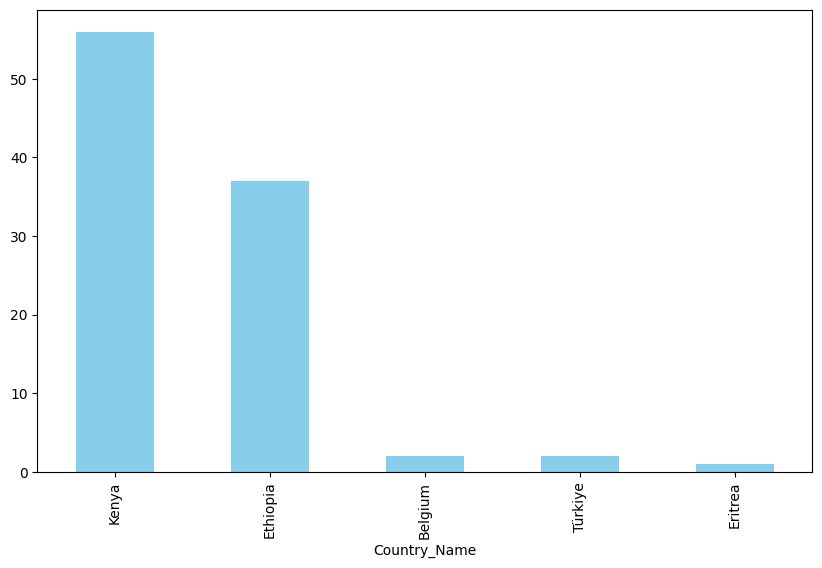

In [51]:
# countries of the top 100 fastest woman (Mark=Time)
top_100 = df_men.sort_values(by='Time_in_seconds', ascending=True).head(100)
top_100['Country_Name'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: xlabel='Year'>

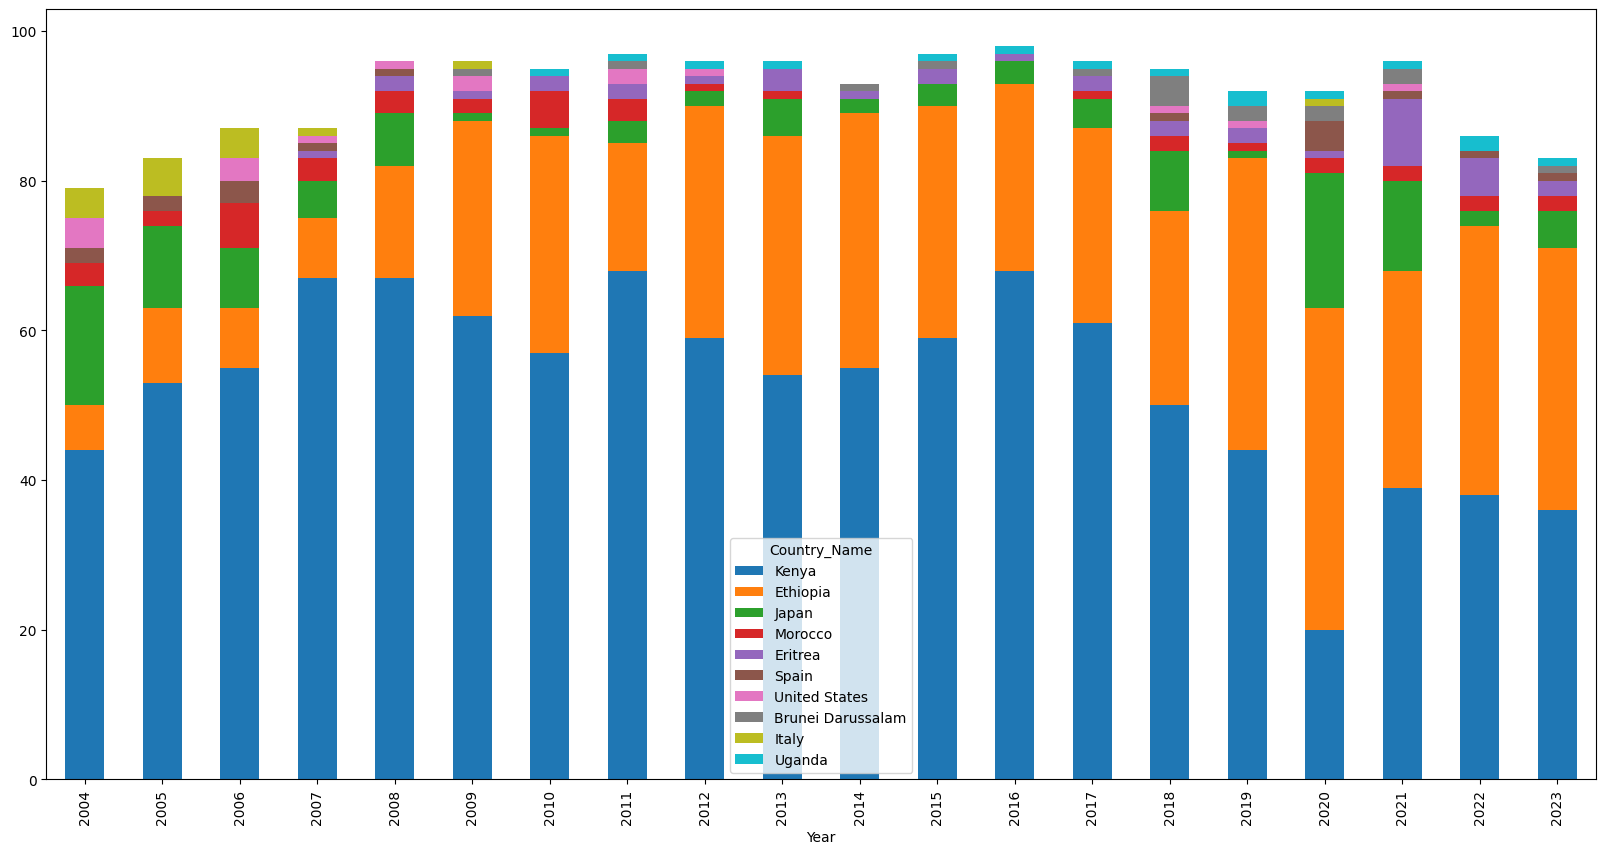

In [52]:
# Countries by year
countries_by_year = df_men.groupby(['Year', 'Country_Name']).size().unstack()
# countries_by_year.plot(kind='bar', stacked=True, figsize=(20, 10))

# Top 10 countries by year
top_10_countries_by_year = countries_by_year.sum().nlargest(10).index
top_10_countries_by_year_df = countries_by_year[top_10_countries_by_year]
top_10_countries_by_year_df.plot(kind='bar', stacked=True, figsize=(20, 10))

<Axes: ylabel='Country_Name'>

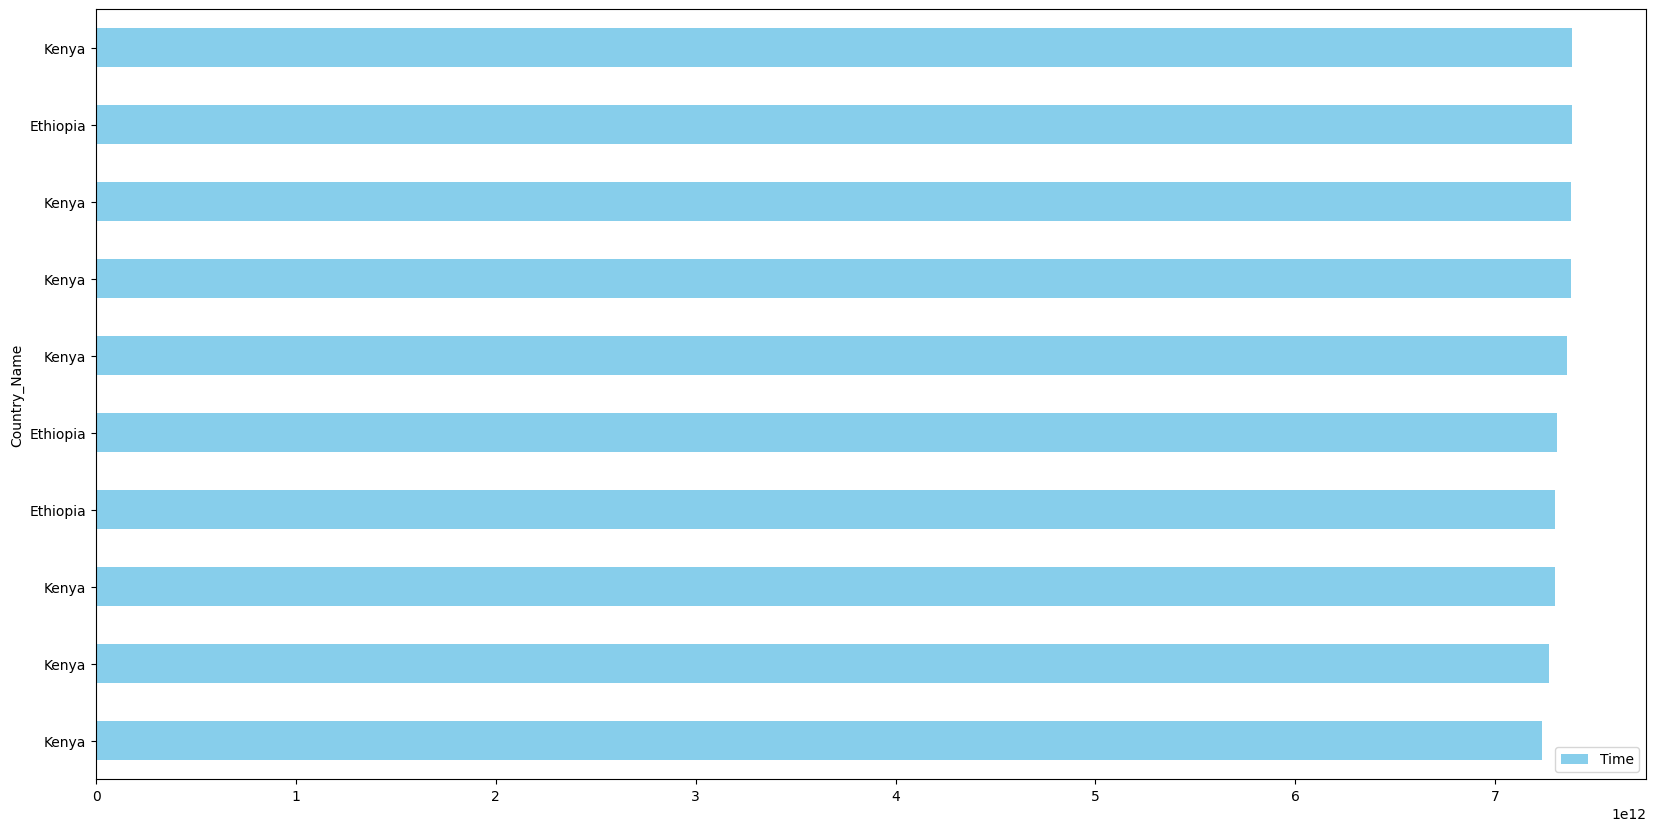

In [53]:

# Top 10 Times over years by countr
# Convert 'Time' to numeric, assuming it's not already
df_men['Time'] = pd.to_numeric(df_men['Time'], errors='coerce')

# Group by 'Country_Name' and 'Year', then find the minimum 'Time' in each group
best_times = df_men.groupby(['Country_Name', 'Year'])['Time'].min().reset_index()

# Find the top 10 performances across all countries and years
top_10_times = best_times.nsmallest(10, 'Time')

# Plot the top 10 times
top_10_times.plot(kind='barh', x='Country_Name', y='Time', figsize=(20, 10), color='skyblue')
